In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import fdrcorrection
import numpy as np
import colorcet as cc
from adjustText import adjust_text

In [2]:
tf_e3_corrs = pd.read_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_dropna.pkl")

In [3]:
tf_e3_corrs.head()

,lineage,TF,E3_ligase,p-val,corr
0,Ampulla of Vater,TFAP2A,KDM2A,0.709839,-0.157329
1,Ampulla of Vater,TFAP2B,KDM2A,0.588720,0.227030
2,Ampulla of Vater,TFAP2C,KDM2A,0.195091,-0.511497
3,Ampulla of Vater,TFAP2D,KDM2A,0.350621,0.381823
4,Ampulla of Vater,TFAP2E,KDM2A,0.270403,-0.444031


In [4]:
tf_lin_filter = pd.read_pickle("pydata/tf_list_by_lineage.pkl")

In [5]:
tf_lin_filter.head()

,OncotreeLineage,TF,class
2979,Biliary Tract,AHR,Positive
2980,Biliary Tract,AIRE,Positive
2989,Biliary Tract,AR,Positive
2991,Biliary Tract,ARHGAP35,Positive
3026,Biliary Tract,BBX,Positive


In [10]:
tf_lin_filter.rename(columns={"OncotreeLineage":"lineage"}, inplace=True)

In [6]:
tf_e3_corrs.shape

(20203650, 5)

In [13]:
tf_e3_corrs = pd.merge(left = tf_e3_corrs, right=tf_lin_filter, how="inner",
                       on=["TF", "lineage"]).rename(columns={"class": "TF-class"})

In [14]:
lineages = tf_e3_corrs["lineage"].unique()
tf_e3_corrs_fdrs = []
for lineage in lineages:
    lin_cors = tf_e3_corrs.loc[tf_e3_corrs["lineage"] == lineage].copy()
    lin_cors["fdr"] = fdrcorrection(lin_cors["p-val"].values)[1]
    tf_e3_corrs_fdrs.append(lin_cors)

In [15]:
tf_e3_corrs_fdrs = pd.concat(tf_e3_corrs_fdrs)

In [16]:
tf_e3_corrs_fdrs.head()

,lineage,TF,E3_ligase,p-val,corr,TF-class,fdr
0,Biliary Tract,AHR,KDM2A,0.989731,-0.002224,Positive,0.999127
1,Biliary Tract,HELT,KDM2A,0.403518,0.143569,Positive,0.943033
2,Biliary Tract,HEY2,KDM2A,0.548662,-0.103340,Positive,0.971636
3,Biliary Tract,HIF3A,KDM2A,0.015809,-0.399413,Positive,0.693428
4,Biliary Tract,MSGN1,KDM2A,0.475539,-0.122799,Positive,0.959081


In [17]:
tf_e3_corrs_fdrs["log10q"] = np.log10(tf_e3_corrs_fdrs["fdr"])*-1

In [18]:
tf_e3_corrs_fdrs.to_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_fdr.pkl")

In [19]:
len(lineages)

22

In [20]:
color_palette = pd.read_pickle("pydata/lineage_palette.pkl")

In [21]:
tf_e3_corrs_fdrs["name"] = tf_e3_corrs_fdrs["TF"] + "-" + tf_e3_corrs_fdrs["E3_ligase"]

In [22]:
tf_e3_corrs_fdrs.head()

,lineage,TF,E3_ligase,p-val,corr,TF-class,fdr,log10q,name
0,Biliary Tract,AHR,KDM2A,0.989731,-0.002224,Positive,0.999127,0.000379,AHR-KDM2A
1,Biliary Tract,HELT,KDM2A,0.403518,0.143569,Positive,0.943033,0.025473,HELT-KDM2A
2,Biliary Tract,HEY2,KDM2A,0.548662,-0.103340,Positive,0.971636,0.012496,HEY2-KDM2A
3,Biliary Tract,HIF3A,KDM2A,0.015809,-0.399413,Positive,0.693428,0.158999,HIF3A-KDM2A
4,Biliary Tract,MSGN1,KDM2A,0.475539,-0.122799,Positive,0.959081,0.018145,MSGN1-KDM2A


In [25]:
tf_e3_corrs_fdrs_significant = tf_e3_corrs_fdrs.loc[tf_e3_corrs_fdrs["fdr"]< 0.1]

In [32]:
tf_e3_corrs_fdrs_significant.to_pickle("pydata/tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant.pkl")
tf_e3_corrs_fdrs_significant.to_csv("pydata/tf_dependency_e3ls_expr_correlation_bylineage_fdr_significant.csv")

In [31]:
tf_e3_corrs_fdrs_significant.head()

,lineage,TF,E3_ligase,p-val,corr,TF-class,fdr,log10q,name
13965,Biliary Tract,DMRT1,PDZRN3,5.360362e-06,0.678751,Positive,0.045134,1.345500,DMRT1-PDZRN3
13987,Biliary Tract,POU3F4,PDZRN3,7.373695e-08,0.760493,Positive,0.001012,2.994961,POU3F4-PDZRN3
13994,Biliary Tract,TP53,PDZRN3,3.209376e-08,0.773384,Positive,0.000587,3.231287,TP53-PDZRN3
26689,Biliary Tract,ZNF221,TRIM26,1.404946e-05,-0.655954,Positive,0.096379,1.016016,ZNF221-TRIM26
45325,Biliary Tract,DMRT1,KLHL10,6.492342e-07,0.722565,Positive,0.007126,2.147155,DMRT1-KLHL10


In [29]:
tf_e3_corrs_fdrs_significant.groupby(["lineage", "TF-class"]).count()

TF  E3_ligase  p-val  corr  fdr  log10q  name
lineage              TF-class                                                
Biliary Tract        Positive    9          9      9     9    9       9     9
Bone                 Positive   27         27     27    27   27      27    27
Bowel                Negative    1          1      1     1    1       1     1
                     Positive    6          6      6     6    6       6     6
Breast               Negative    3          3      3     3    3       3     3
                     Positive    1          1      1     1    1       1     1
CNS/Brain            Positive  318        318    318   318  318     318   318
Head and Neck        Negative    4          4      4     4    4       4     4
                     Positive    6          6      6     6    6       6     6
Lung                 Positive    2          2      2     2    2       2     2
Lymphoid             Negative   81         81     81    81   81      81    81
                     Positive   33         33     33    33   33      33    33
Myeloid              Negative    2          2      2     2    2       2     2
Ovary/Fallopian Tube Negative    1          1      1     1    1       1     1
                     Positive    7          7      7     7    7       7     7
Pancreas             Positive    1          1      1     1    1       1     1
Pleura               Positive    2          2      2     2    2       2     2
Prostate             Positive    7          7      7     7    7       7     7
Skin                 Negative   66         66     66    66   66      66    66
                     Positive   19         19     19    19   19      19    19
Uterus               Negative    1          1      1     1    1       1     1
                     Positive   11         11     11    11   11      11    11

In [44]:
def get_volcano_plot(l):
    plt.figure(figsize=(5,4))
    ax = plt.subplot(111)
    l_corr =tf_e3_corrs_fdrs.loc[tf_e3_corrs_fdrs["lineage"] == l] 
    sig_df = l_corr[l_corr["log10q"] > 1].sort_values(by=["fdr"]).iloc[0:20,:]
    sns.scatterplot(data=l_corr[l_corr["fdr"] > 0.1], x = "corr", y = "log10q", 
                    s = 1, color = "grey")
    sns.scatterplot(data=l_corr[l_corr["fdr"] < 0.1], x = "corr", y = "log10q", 
                    s = 3)
    text = []
    for i, row in sig_df.iterrows():
        text.append(plt.text(x =row["corr"], y = row["log10q"], s = row["name"], fontsize=6, 
                             ha='center', va='center')) 
    adjust_text(text, expand=(1.5, 1.5), arrowprops = dict(arrowstyle="-", color = "red", alpha=1, lw=0.2),
                x = sig_df["corr"], y = sig_df["log10q"])
    plt.title(l)
    ax.spines[['right', 'top']].set_visible(False)
    plt.xlabel("Pearson correlation")
    plt.ylabel("-log10(q-value)")
    plt.show()
    plt.clf()
    plt.close("all")

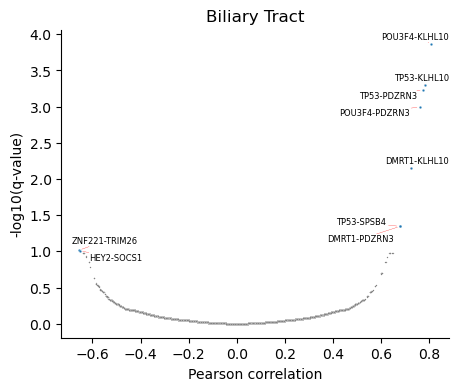

8 [-0.87410108 -0.95585415]
10 [-0.32737377 -0.4504243 ]


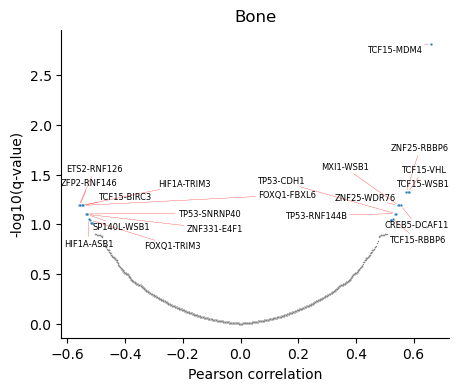

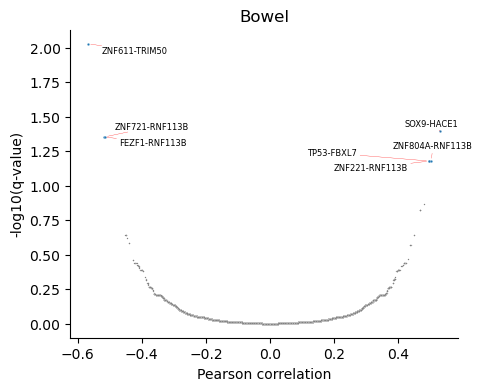

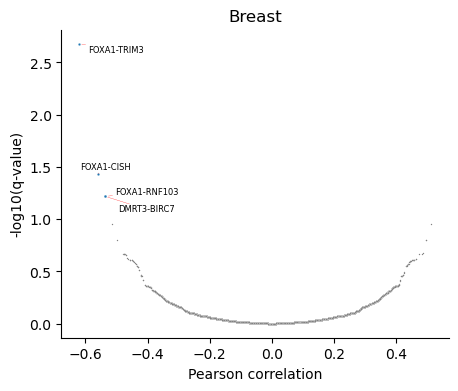

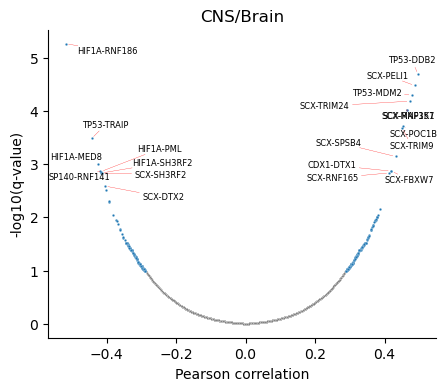

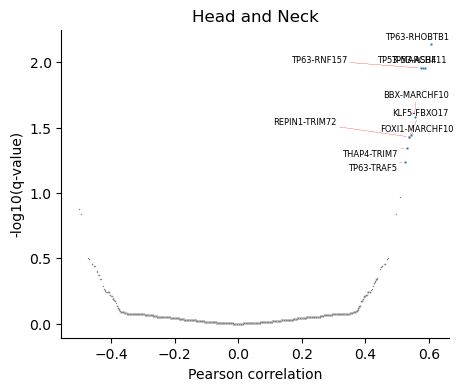

0 [-0.23413873 -0.22373696]
1 [-0.47306881 -0.32424107]


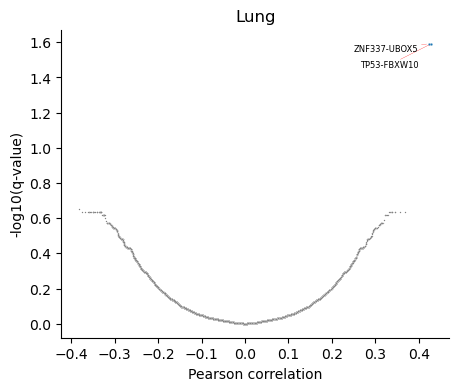

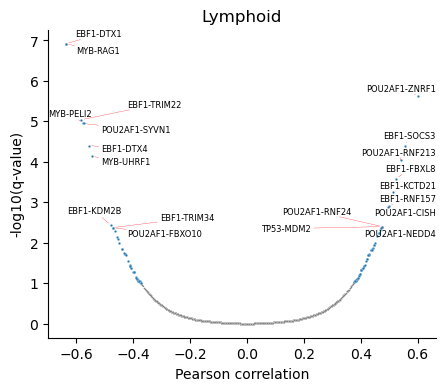

0 [ 0.53196783 -0.96443705]
1 [ 0.6188674 -0.5948207]


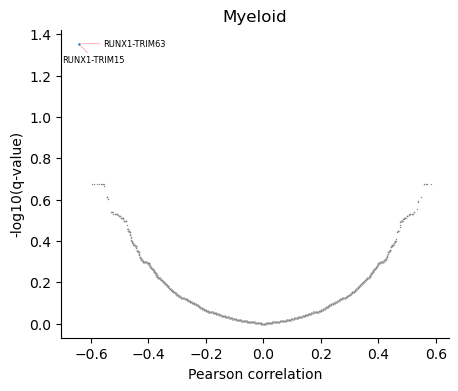

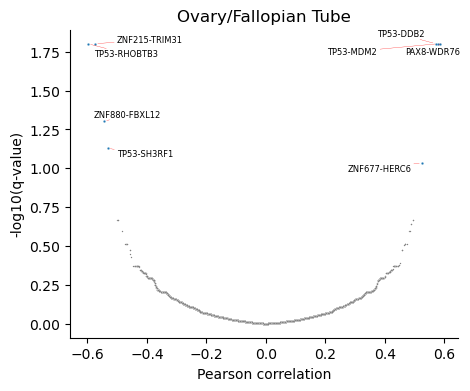

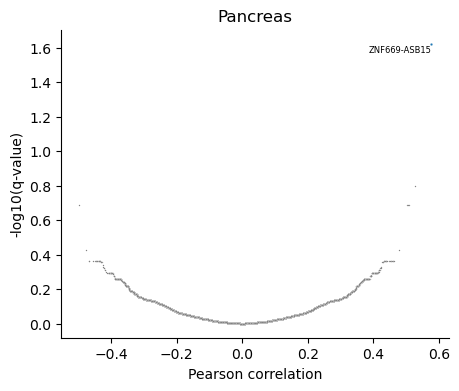

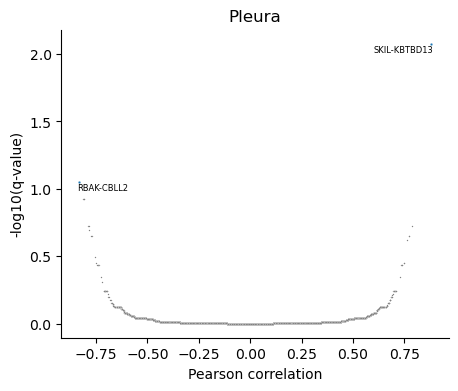

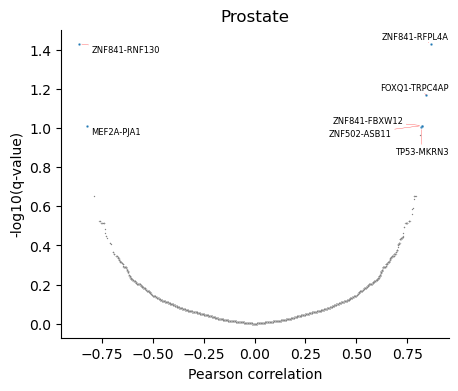

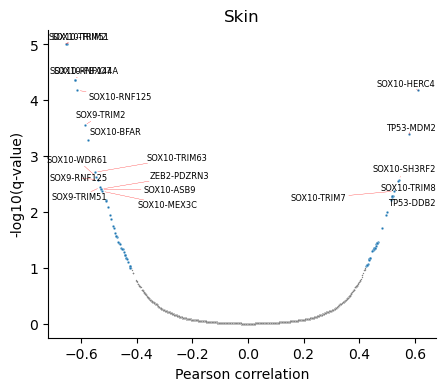

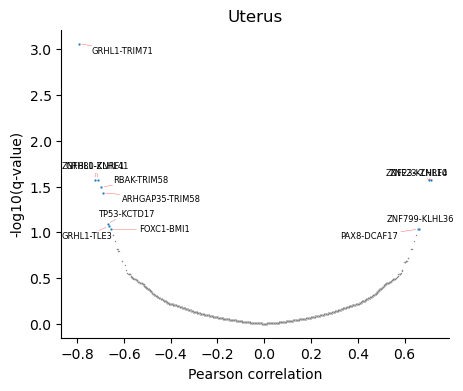

In [45]:
lineage_sig = tf_e3_corrs_fdrs_significant["lineage"].unique()
for lineage in lineage_sig:
    get_volcano_plot(lineage)